In [1]:
import pandas as pd

df = pd.read_csv("hf://datasets/azrai99/coursera-course-dataset/coursera_course_2024.csv")

In [2]:
df.head()

,Unnamed: 0,title,enrolled,rating,num_reviews,Instructor,Organization,Skills,Description,Modules/Courses,Level,Schedule,URL,Satisfaction Rate
0,0,Analytical Solutions to Common Healthcare Prob...,"5,710",4.6,27.0,Brian Paciotti,"University of California, Davis",[],"In this course, we’re going to go over analyti...",4 modules,Intermediate level,10 hours to complete (3 weeks at 3 hours a week),https://www.coursera.org/learn/analytical-solu...,NaN
1,1,Understanding Einstein: The Special Theory of ...,"170,608",4.9,3061.0,Larry Randles Lagerstrom,Stanford University,[],In this course we will seek to “understand Ein...,8 modules,Beginner level,NaN,https://www.coursera.org/learn/einstein-relati...,98%
2,2,JavaScript for Beginners Specialization,"37,762",4.7,772.0,William Mead,"University of California, Davis","['web interactivty', 'Jquery', 'Data Manipulat...",This Specialization is intended for the learne...,4 course series,Beginner level,2 months (at 10 hours a week),https://www.coursera.org/specializations/javas...,NaN
3,3,"Security, Compliance, and Governance for AI So...",Enrollment number not found,Rating not found,2024.0,AWS Instructor,Amazon Web Services,[],This course helps you understand some common i...,1 module,Beginner level,1 hour to complete,https://www.coursera.org/learn/security-compli...,NaN
4,4,Understanding Fitness Programming,Enrollment number not found,Rating not found,NaN,Casey DeJong,National Academy of Sports Medicine,"['Cardiovascular training', 'Resistance traini...","In this course, you will learn to identify app...",5 modules,Beginner level,27 hours to complete (3 weeks at 9 hours a week),https://www.coursera.org/learn/understanding-f...,NaN


In [3]:
print(df.info())  # Check data types and missing values
print(df.head())  # Preview data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6645 entries, 0 to 6644
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6645 non-null   int64  
 1   title              6645 non-null   object 
 2   enrolled           6645 non-null   object 
 3   rating             6645 non-null   object 
 4   num_reviews        5253 non-null   float64
 5   Instructor         6644 non-null   object 
 6   Organization       6645 non-null   object 
 7   Skills             6645 non-null   object 
 8   Description        6635 non-null   object 
 9   Modules/Courses    6635 non-null   object 
 10  Level              5867 non-null   object 
 11  Schedule           4757 non-null   object 
 12  URL                6645 non-null   object 
 13  Satisfaction Rate  2198 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 726.9+ KB
None
   Unnamed: 0                                          

In [4]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Check how many non-numeric values were replaced
print(df['rating'].isnull().sum())

# Fill missing values with the mean rating
df['rating'].fillna(df['rating'].mean(), inplace=True)

1436


In [5]:
df['rating'].fillna(df['rating'].mean(), inplace=True)


In [6]:
# Remove commas and convert 'enrolled' to integer
import numpy as np
df['enrolled'] = df['enrolled'].str.replace(',', '').replace('Enrollment number not found', np.nan)
df['enrolled'] = pd.to_numeric(df['enrolled'], errors='coerce')

# Convert 'num_reviews' to numeric
df['num_reviews'] = pd.to_numeric(df['num_reviews'], errors='coerce')

# Fill missing values for 'num_reviews' with median (or mean)
df['num_reviews'].fillna(df['num_reviews'].median(), inplace=True)

# Check final data types
print(df.dtypes)


Unnamed: 0             int64
title                 object
enrolled             float64
rating               float64
num_reviews          float64
Instructor            object
Organization          object
Skills                object
Description           object
Modules/Courses       object
Level                 object
Schedule              object
URL                   object
Satisfaction Rate     object
dtype: object


In [7]:
df['title'] = df['title'].str.lower().str.replace('[^a-zA-Z0-9 ]', '', regex=True)
df['Description'] = df['Description'].str.lower().str.replace('[^a-zA-Z0-9 ]', '', regex=True)
df['Skills'] = df['Skills'].str.lower().str.replace('[^a-zA-Z0-9, ]', '', regex=True)  # Keep commas


In [8]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Tokenize, remove stopwords, and apply lemmatization
def preprocess_text(text):
    words = word_tokenize(text.lower())  # Convert to lowercase & tokenize
    words = [w for w in words if w.isalpha() and w not in stop_words]  # Remove punctuation & stopwords
    words = [lemmatizer.lemmatize(w) for w in words]  # Lemmatization
    return ' '.join(words)  # Reconstruct cleaned text

# Apply to course descriptions
df['Description'] = df['Description'].apply(lambda x: preprocess_text(x) if isinstance(x, str) else '')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gowth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gowth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gowth\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
print(df[['title', 'Description']].sample(5))  # Random sample for inspection


                                                  title  \
640     fundamental linear algebra concepts with python   
820   capstone preparing to work as a cloud support ...   
2044  strategies and tools to mitigate agricultural ...   
2260                        data visualization capstone   
4616                                   learn typescript   

                                            Description  
640   course youll introduced finding inverse matrix...  
820   course focus practical aspect preparing work s...  
2044  learner examine risk management strategy crop ...  
2260  data visualization critical skill anyone routi...  
4616  proficient developer html cs javascript lookin...  


In [10]:
from collections import Counter

# Combine all descriptions into one large text
all_words = ' '.join(df['Description'].dropna()).split()

# Count occurrences
word_counts = Counter(all_words)

# Show top 20 most common words
print(word_counts.most_common(20))


[('course', 30762), ('module', 20455), ('data', 18811), ('learn', 17173), ('assignment', 11581), ('discussion', 10545), ('youll', 10062), ('also', 9897), ('use', 8651), ('learning', 8535), ('prompt', 8413), ('project', 8277), ('system', 8154), ('using', 7886), ('well', 7542), ('skill', 7261), ('concept', 7005), ('week', 6905), ('model', 6650), ('explore', 6559)]


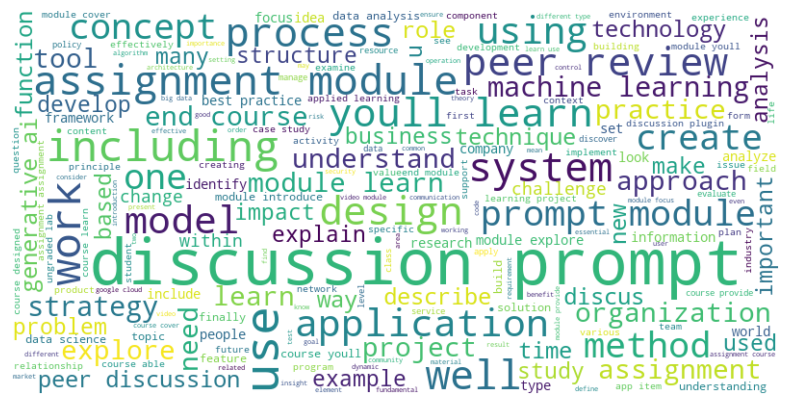

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(' '.join(all_words))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [12]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5,000 words
tfidf_matrix = vectorizer.fit_transform(df['Description'].dropna())

# Convert to DataFrame for inspection
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

print(tfidf_df.head())  # View extracted features


    ab  ability      able  aboriginal  abortion  abroad  absolute  abstract  \
0  0.0  0.00000  0.075384         0.0       0.0     0.0       0.0       0.0   
1  0.0  0.00000  0.000000         0.0       0.0     0.0       0.0       0.0   
2  0.0  0.00000  0.063171         0.0       0.0     0.0       0.0       0.0   
3  0.0  0.00000  0.000000         0.0       0.0     0.0       0.0       0.0   
4  0.0  0.01761  0.082986         0.0       0.0     0.0       0.0       0.0   

   abstraction  abuse  ...    youll     young  youre  youth  youtube  youve  \
0          0.0    0.0  ...  0.09425  0.000000    0.0    0.0      0.0    0.0   
1          0.0    0.0  ...  0.00000  0.082325    0.0    0.0      0.0    0.0   
2          0.0    0.0  ...  0.00000  0.000000    0.0    0.0      0.0    0.0   
3          0.0    0.0  ...  0.00000  0.000000    0.0    0.0      0.0    0.0   
4          0.0    0.0  ...  0.00000  0.000000    0.0    0.0      0.0    0.0   

   zero  zika  zone  zoom  
0   0.0   0.0   0.0   

In [14]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute similarity between courses
similarity_matrix = cosine_similarity(tfidf_matrix)

# Convert to DataFrame for better readability
similarity_df = pd.DataFrame(similarity_matrix, index=df['title'], columns=df['title'])

print(similarity_df.head())  # Preview similarity scores between courses


title                                               analytical solutions to common healthcare problems  \
title                                                                                                    
analytical solutions to common healthcare problems                                           1.000000    
understanding einstein the special theory of re...                                           0.035736    
javascript for beginners specialization                                                      0.158793    
security compliance and governance for ai solut...                                           0.044995    
understanding fitness programming                                                            0.036589    

title                                               understanding einstein the special theory of relativity  \
title                                                                                                         
analytical solutions to common heal

In [15]:
def recommend_courses(course_title, top_n=5, threshold=0.4):
    if course_title not in similarity_df.index:
        return "Course not found in dataset!"

    # Get similarity scores and filter by threshold
    sim_scores = similarity_df[course_title].sort_values(ascending=False)
    sim_scores = sim_scores[sim_scores > threshold]  # Apply threshold

    # Exclude the course itself and limit recommendations
    recommended_courses = sim_scores.iloc[1:top_n+1]

    return recommended_courses

# Example usage
recommendations = recommend_courses("javascript for beginners specialization", top_n=5, threshold=0.5)
print(recommendations)



title
javascript programming essentials    0.547074
mobile development and javascript    0.508616
javascript basics                    0.506348
Name: javascript for beginners specialization, dtype: float64


In [16]:
df['title'] = df['title'].str.strip().str.lower()
similarity_df.index = similarity_df.index.str.strip().str.lower()
similarity_df.columns = similarity_df.columns.str.strip().str.lower()


In [17]:
print("javascript for beginners specialization" in df['title'].values)


True


In [18]:
print(df['title'].sample(10))


2444          infectious disease modelling specialization
3720    product management developing and delivering a...
621                business english finance and economics
4833    backend infrastructure servers secure apis and...
3349    hacking covid19 metabolic pathway analysis yie...
5797                                the french revolution
3096                                   the digital divide
2757    data skills for excel professionals specializa...
3473                      identifying patient populations
3507                       design thinking for innovation
Name: title, dtype: object


In [19]:
def recommend_filtered_courses(course_title, top_n=5, threshold=0.4, target_level="Beginner"):
    course_title = course_title.strip().lower()  # Standardize input format
    
    if course_title not in similarity_df.index:
        return "Course not found! Try searching similar titles."

    sim_scores = similarity_df[course_title].sort_values(ascending=False)
    sim_scores = sim_scores[sim_scores > threshold]

    recommended_courses = df.loc[df['title'].isin(sim_scores.index)]  # Match existing titles
    recommended_courses = recommended_courses[recommended_courses['Level'] == target_level]

    return recommended_courses[['title', 'rating']].head(top_n)

# Test the fixed function
filtered_recommendations = recommend_filtered_courses("javascript for beginners specialization", top_n=5, target_level="Beginner")
print(filtered_recommendations)



Empty DataFrame
Columns: [title, rating]
Index: []


In [20]:
print(df['title'].sample(10))  # View 10 random titles from df
print(similarity_df.index[:10])  # View 10 random titles from similarity matrix


6174                 agile planning for software products
6474                     managing human capital in retail
6410                                     alteryx advanced
2762                               advanced r programming
524                electron and ion beam characterization
256          reading and comprehension of text in english
1706      take the lead on healthcare quality improvement
465     microsoft azure data fundamentals dp900 exam p...
889     childrens human rights  an interdisciplinary i...
3584                                jenkins for beginners
Name: title, dtype: object
Index(['analytical solutions to common healthcare problems',
       'understanding einstein the special theory of relativity',
       'javascript for beginners specialization',
       'security compliance and governance for ai solutions',
       'understanding fitness programming',
       'educating deaf children becoming an empowered teacher',
       'scandinavian film and television',
   

In [21]:
print(df['title'].str.lower().str.strip().sample(10))  # View titles in df
print(similarity_df.index.str.lower().str.strip()[:10])  # View titles in similarity_df


1735                             workday in action series
5001                introduction to intellectual property
5702    understanding modern physics ii quantum mechan...
3205     quantifying relationships with regression models
2597    positive psychology applications and intervent...
4800          pmp exam prep project management principles
5848                       virtual teacher specialization
4926    nursing informatics leadership theory and prac...
3462              taxation of multinationals for everyone
1459    church administration human resources speciali...
Name: title, dtype: object
Index(['analytical solutions to common healthcare problems',
       'understanding einstein the special theory of relativity',
       'javascript for beginners specialization',
       'security compliance and governance for ai solutions',
       'understanding fitness programming',
       'educating deaf children becoming an empowered teacher',
       'scandinavian film and television',
   

In [22]:
df['title'] = df['title'].str.lower().str.strip()
similarity_df.index = similarity_df.index.str.lower().str.strip()
similarity_df.columns = similarity_df.columns.str.lower().str.strip()


In [23]:
print("javascript for beginners specialization" in df['title'].values)


True


In [24]:
print(df[df['title'].str.contains("javascript", case=False)].head())


     Unnamed: 0                                    title  enrolled  rating  \
2             2  javascript for beginners specialization   37762.0     4.7   
50           50     introduction to html css  javascript   31178.0     4.4   
94           94               javascript jquery and json  100986.0     4.6   
519         519   javascript full stack capstone project    2161.0     4.8   
547         547                         learn javascript    9932.0     4.7   

     num_reviews                 Instructor                     Organization  \
2          772.0               William Mead  University of California, Davis   
50         270.0           Michelle Saltoun                              IBM   
94         812.0  Charles Russell Severance           University of Michigan   
519         19.0               Upkar Lidder                              IBM   
547        109.0          Per Harald Borgen                          Scrimba   

                                                Sk

In [25]:
sim_scores = similarity_df["javascript for beginners specialization"].sort_values(ascending=False)


In [26]:
print(similarity_df.index[:10])  # Check available course titles


Index(['analytical solutions to common healthcare problems',
       'understanding einstein the special theory of relativity',
       'javascript for beginners specialization',
       'security compliance and governance for ai solutions',
       'understanding fitness programming',
       'educating deaf children becoming an empowered teacher',
       'scandinavian film and television',
       'foundations of music promotion  branding', 'photovoltaic systems',
       'sel for students a path to social emotional wellbeing'],
      dtype='object', name='title')


In [27]:
recommended_courses = df[df['title'].isin(sim_scores.index)]


In [28]:
print(sim_scores.index[:10])  # Inspect filtered courses


Index(['javascript for beginners specialization',
       'javascript programming essentials',
       'mobile development and javascript', 'javascript basics',
       'programming with javascript', 'javascript deep dive',
       'introduction to javascript and ajax building web apps',
       'become a javascript developer specialization',
       'javascript security specialization', 'learn javascript'],
      dtype='object', name='title')


In [29]:
# Test similarity-based recommendations
print("🔹 General Recommendations:")
print(recommend_courses("javascript for beginners specialization", top_n=5))

# Test level-filtered recommendations
print("\n🔹 Beginner-Level Recommendations:")
print(recommend_filtered_courses("javascript for beginners specialization", top_n=5, target_level="Beginner level"))


🔹 General Recommendations:
title
javascript programming essentials    0.547074
mobile development and javascript    0.508616
javascript basics                    0.506348
programming with javascript          0.497643
javascript deep dive                 0.484047
Name: javascript for beginners specialization, dtype: float64

🔹 Beginner-Level Recommendations:
                                        title  rating
2     javascript for beginners specialization     4.7
547                          learn javascript     4.7
948                         javascript basics     4.7
1860        javascript programming essentials     4.6
3301        mobile development and javascript     4.2


In [30]:
print(df['Level'].unique())  # View all unique levels


['Intermediate level' 'Beginner level' 'Advanced level' nan]


In [31]:
print(df.columns)  # List all available column names


Index(['Unnamed: 0', 'title', 'enrolled', 'rating', 'num_reviews',
       'Instructor', 'Organization', 'Skills', 'Description',
       'Modules/Courses', 'Level', 'Schedule', 'URL', 'Satisfaction Rate'],
      dtype='object')


In [32]:
user_course_matrix = df.pivot_table(index="enrolled", columns="title", values="rating", fill_value=0)

print(user_course_matrix.shape)  # Check matrix dimensions


(4615, 4858)


In [34]:
from sklearn.decomposition import NMF


In [35]:
nmf_model = NMF(n_components=10, init="random", random_state=42)
enrollment_factors = nmf_model.fit_transform(user_course_matrix)
course_factors = nmf_model.components_

# Convert results to DataFrame
course_profiles = pd.DataFrame(course_factors, columns=user_course_matrix.columns)


In [36]:
def recommend_similar_courses(course_title, top_n=5):
    if course_title not in course_profiles.columns:
        return "Course not found! Try searching similar titles."

    # Get similarity scores based on learned factors
    course_vector = course_profiles[course_title]
    similarity_scores = course_profiles.T.dot(course_vector)

    # Sort by similarity and exclude the given course itself
    recommended_courses = similarity_scores.sort_values(ascending=False).iloc[1:top_n+1]

    return recommended_courses

# Example usage
print(recommend_similar_courses("javascript for beginners specialization", top_n=5))


title
artificial intelligence for breast cancer detection        3.768241e-44
serverless data processing with dataflow specialization    3.358650e-44
introduction to internet of things                         1.416578e-44
navigating generative ai for leaders specialization        1.388246e-44
cuda at scale for the enterprise                           9.066099e-45
dtype: float64


In [40]:
import numpy as np
enrollment_number = 50000  # or any other number you want to test with

# Convert index to a numeric array before finding closest match
numeric_index = pd.to_numeric(user_course_matrix.index, errors="coerce")
closest_enrollment = numeric_index[np.abs(numeric_index - enrollment_number).argmin()]

print(closest_enrollment)  # Verify the closest match


50027.0


In [41]:
import numpy as np

# Convert index to a numeric array
numeric_index = pd.to_numeric(user_course_matrix.index, errors="coerce")

# Find the closest enrollment value
closest_enrollment = numeric_index[np.abs(numeric_index - enrollment_number).argmin()]

print(closest_enrollment)  # Verify the closest match


50027.0


In [42]:
import numpy as np
import pandas as pd

# Convert index to a numeric array
numeric_index = pd.to_numeric(user_course_matrix.index, errors="coerce")

# Find the closest enrollment match
closest_enrollment = numeric_index[np.abs(numeric_index - enrollment_number).argmin()]

print(f"Closest enrollment match: {closest_enrollment}")  # Verify output


Closest enrollment match: 50027.0


In [43]:
# Reshape user_vector to ensure proper multiplication
# Ensure closest enrollment is correctly retrieved
user_idx = user_course_matrix.index.get_loc(closest_enrollment)

# Extract corresponding factor values for user
user_vector = enrollment_factors[user_idx, :]  # Correct indexing

print("User vector shape after extraction:", user_vector.shape)  # Debug output

# Now reshape it properly
user_vector = user_vector.reshape(1, -1)


User vector shape after extraction: (10,)


In [44]:
# Reshape user_vector correctly
user_vector = user_vector.reshape(1, -1)

# Perform dot product with correctly aligned dimensions
predicted_preferences = pd.Series(user_vector.dot(course_profiles).flatten(), index=course_profiles.columns)

# Sort and display top recommendations
print(predicted_preferences.sort_values(ascending=False).head(5))



title
chatgpt  zapier agentic ai for everyone                    6.651420e-44
artificial intelligence for breast cancer detection        6.374278e-44
serverless data processing with dataflow specialization    5.681421e-44
introduction to internet of things                         2.396253e-44
navigating generative ai for leaders specialization        2.348328e-44
dtype: float64


In [45]:
print("User vector shape:", user_vector.shape)  # Should be (1, 10)
print("Course profiles shape:", course_profiles.shape)  # Should be (10, 4858)


User vector shape: (1, 10)
Course profiles shape: (10, 4858)


In [ ]:
course_profiles = course_profiles.T
print("Transposed Course Profiles Shape:", course_profiles.shape)  # Should now match


In [ ]:
print("Course Profiles Shape:", course_profiles.shape)  # Should be (10, 4858)



In [ ]:
course_profiles.index = df["title"].unique()[:4858]  # Set row index to match courses


In [ ]:
print(course_profiles.index[:10])  # Should show actual course names, not numbers


In [ ]:
predicted_preferences = pd.Series(user_vector.dot(course_profiles.T).flatten(), index=course_profiles.index)


In [ ]:
print("User vector shape:", user_vector.shape)  # Should be (1, 10)
print("Course profiles shape:", course_profiles.shape)  # Should be (4858, 10)
print("Transposed Course Profiles Shape:", course_profiles.T.shape)  # Should be (10, 4858)


In [ ]:
# Perform dot product with properly transposed matrix
predicted_preferences = pd.Series(user_vector.dot(course_profiles.T).flatten(), index=course_profiles.index)

# Display top recommendations
print(predicted_preferences.sort_values(ascending=False).head(5))


In [ ]:
def recommend_courses_for_enrollment(enrollment_number, top_n=5):
    numeric_index = pd.to_numeric(user_course_matrix.index, errors="coerce")
    closest_enrollment = numeric_index[np.abs(numeric_index - enrollment_number).argmin()]
    
    # Ensure enrollment_factors is correctly indexed
    user_vector = enrollment_factors[user_course_matrix.index.get_loc(closest_enrollment), :]

    # Reshape to match matrix dimensions
    user_vector = user_vector.reshape(1, -1)

    # Perform dot product
    predicted_preferences = pd.Series(user_vector.dot(course_profiles.T).flatten(), index=course_profiles.index)

    return predicted_preferences.sort_values(ascending=False).head(top_n)

# Test the function
recommendations = recommend_courses_for_enrollment(enrollment_number=50000, top_n=5)
print(recommendations)



In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_scores = scaler.fit_transform(predicted_preferences.values.reshape(-1, 1))
predicted_preferences = pd.Series(normalized_scores.flatten(), index=predicted_preferences.index)

print(predicted_preferences.sort_values(ascending=False).head(5))


In [ ]:
final_scores = predicted_preferences * df.set_index("title")["rating"]
print(final_scores.sort_values(ascending=False).head(5))


In [ ]:
hybrid_scores = 0.6 * final_scores + 0.4 * similarity_df.mean(axis=1)
print(hybrid_scores.sort_values(ascending=False).head(5))


In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA to course embeddings
pca = PCA(n_components=2)
course_coords = pca.fit_transform(course_profiles)

# Build DataFrame for plotting
pca_df = pd.DataFrame(course_coords, columns=["PC1", "PC2"], index=course_profiles.index)

# Plot
plt.figure(figsize=(12, 7))
plt.scatter(pca_df["PC1"], pca_df["PC2"], alpha=0.6)
plt.title("PCA of Course Embeddings")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Optionally annotate a few points
for i, title in enumerate(pca_df.index[:10]):
    plt.annotate(title[:25], (pca_df.iloc[i, 0], pca_df.iloc[i, 1]))

plt.grid(True)
plt.show()


In [ ]:
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42, init='pca', learning_rate='auto')
tsne_coords = tsne.fit_transform(course_profiles)

# Plot
tsne_df = pd.DataFrame(tsne_coords, columns=["Dim1", "Dim2"], index=course_profiles.index)

plt.figure(figsize=(12, 7))
plt.scatter(tsne_df["Dim1"], tsne_df["Dim2"], alpha=0.6, cmap='viridis')
plt.title("t-SNE Projection of Course Embeddings")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")

for i, title in enumerate(tsne_df.index[:10]):
    plt.annotate(title[:25], (tsne_df.iloc[i, 0], tsne_df.iloc[i, 1]))

plt.grid(True)
plt.show()
